# Importing Libraries

In [2]:
!pip install missingno

  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import datetime
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [32]:
data = pd.read_csv('data.csv')
print(data.shape)

(18207, 89)


In [33]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [34]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [35]:
data.iloc[:, 2:].describe().style.background_gradient(cmap='cividis')

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [36]:
# Descriptive statistics for catergorical columns
data.iloc[:, 13:].describe(include='object')

,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18159,18159,18159,18159,18147,16654,1264,17918,18159,18159,...,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,2,9,10,2,27,1736,341,36,21,57,...,99,99,99,95,98,108,108,108,98,1244
top,Right,Medium/ Medium,Normal,No,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,...,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,13948,9810,10595,16505,2152,1538,20,4819,2881,1483,...,660,660,660,713,669,634,634,634,669,557


# Cleaning Data

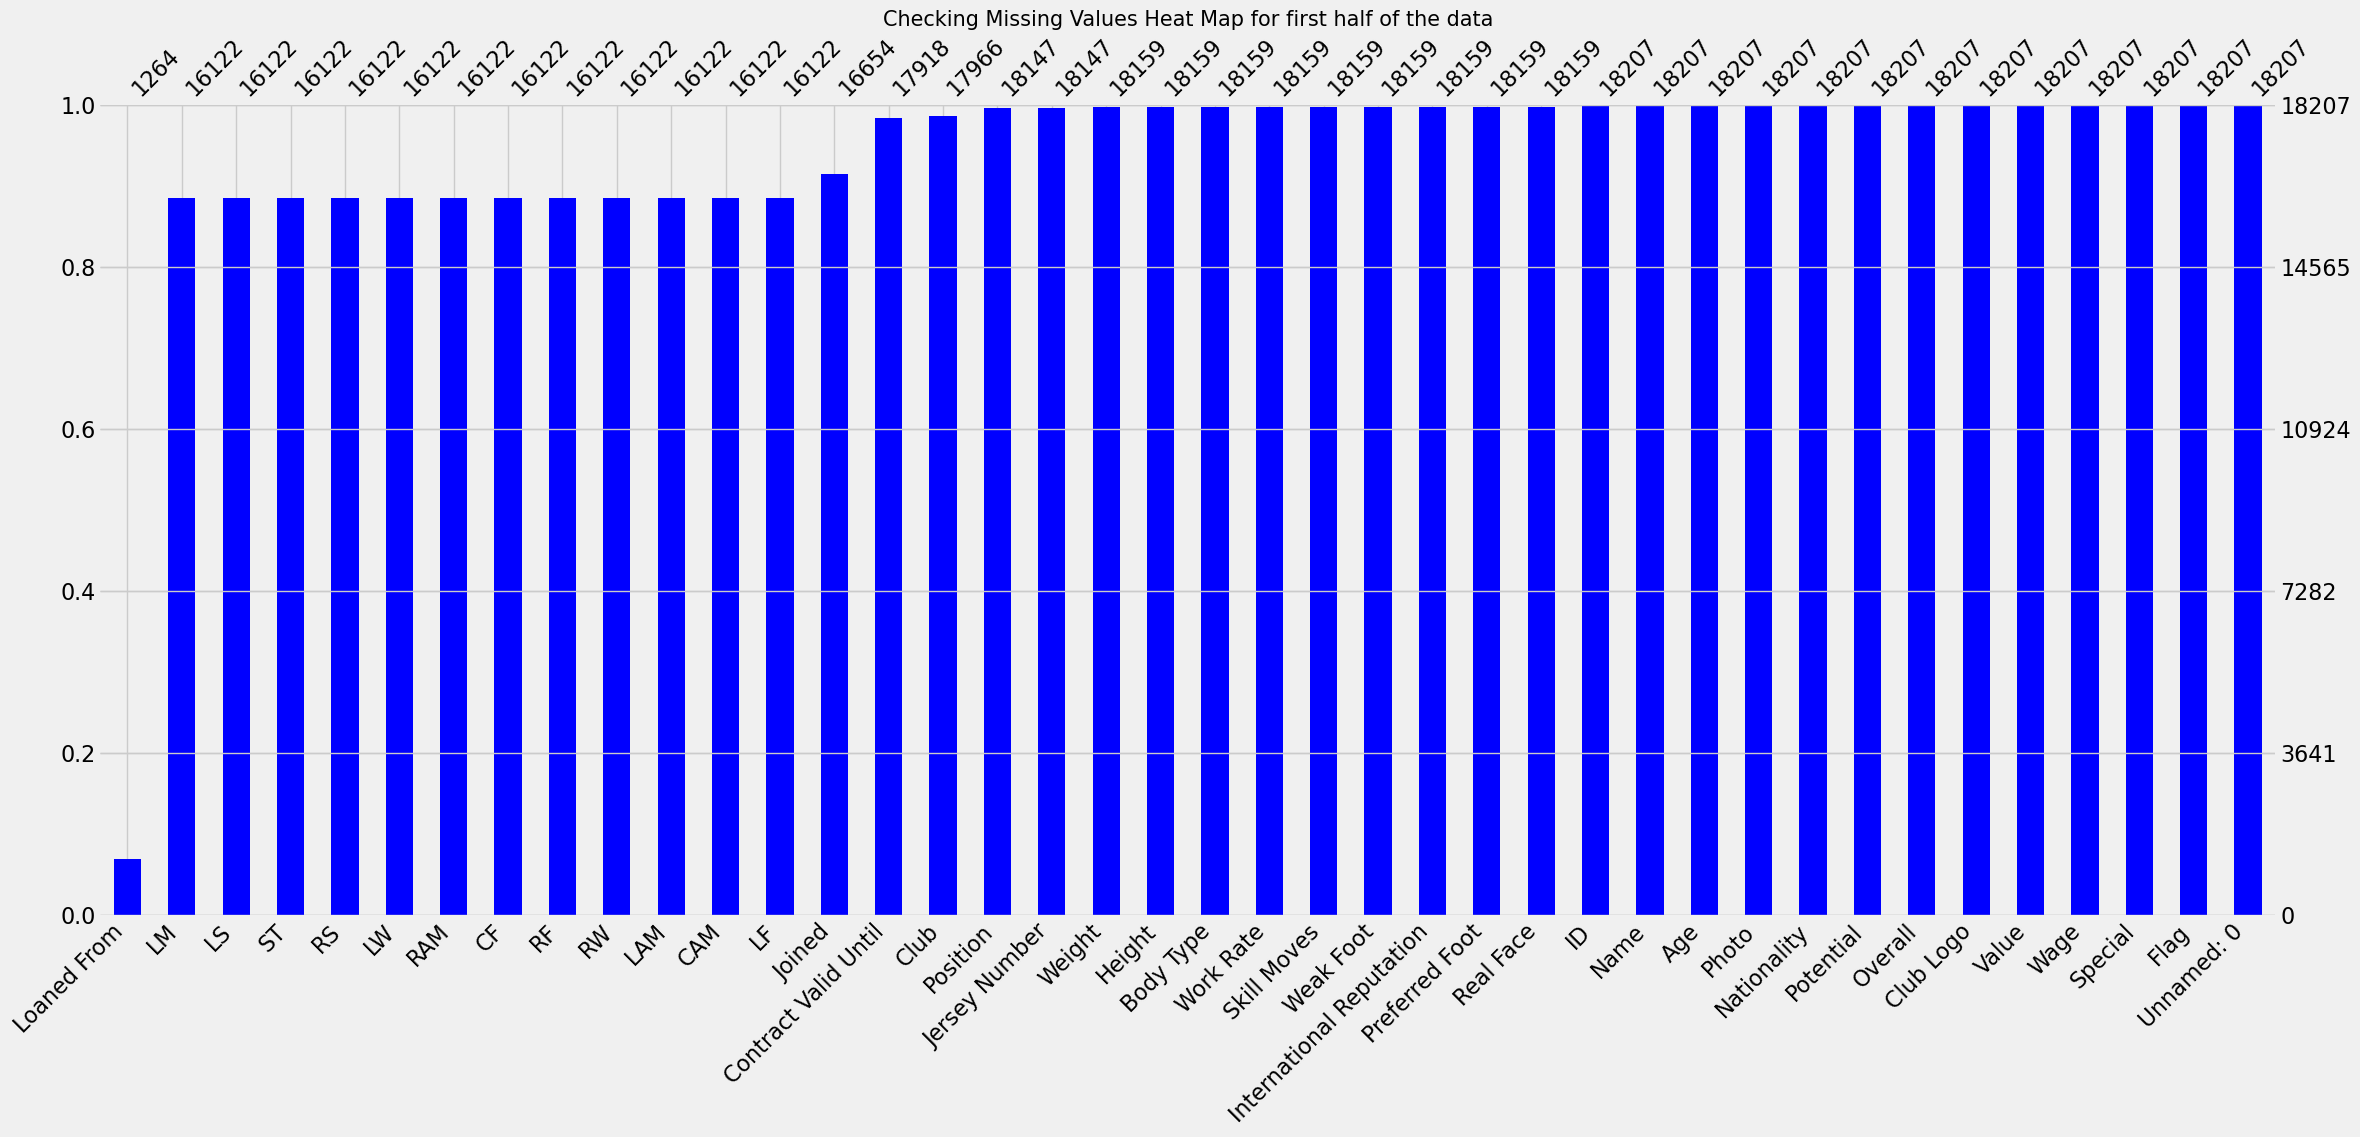

In [37]:
# checking if the data contains any NULL value
# Visualize missing values as a matrix 
mno.bar(data.iloc[:, :40],
        color = 'blue',
        sort = 'ascending') 
plt.title('Checking Missing Values Heat Map for first half of the data', fontsize = 15)
plt.show()

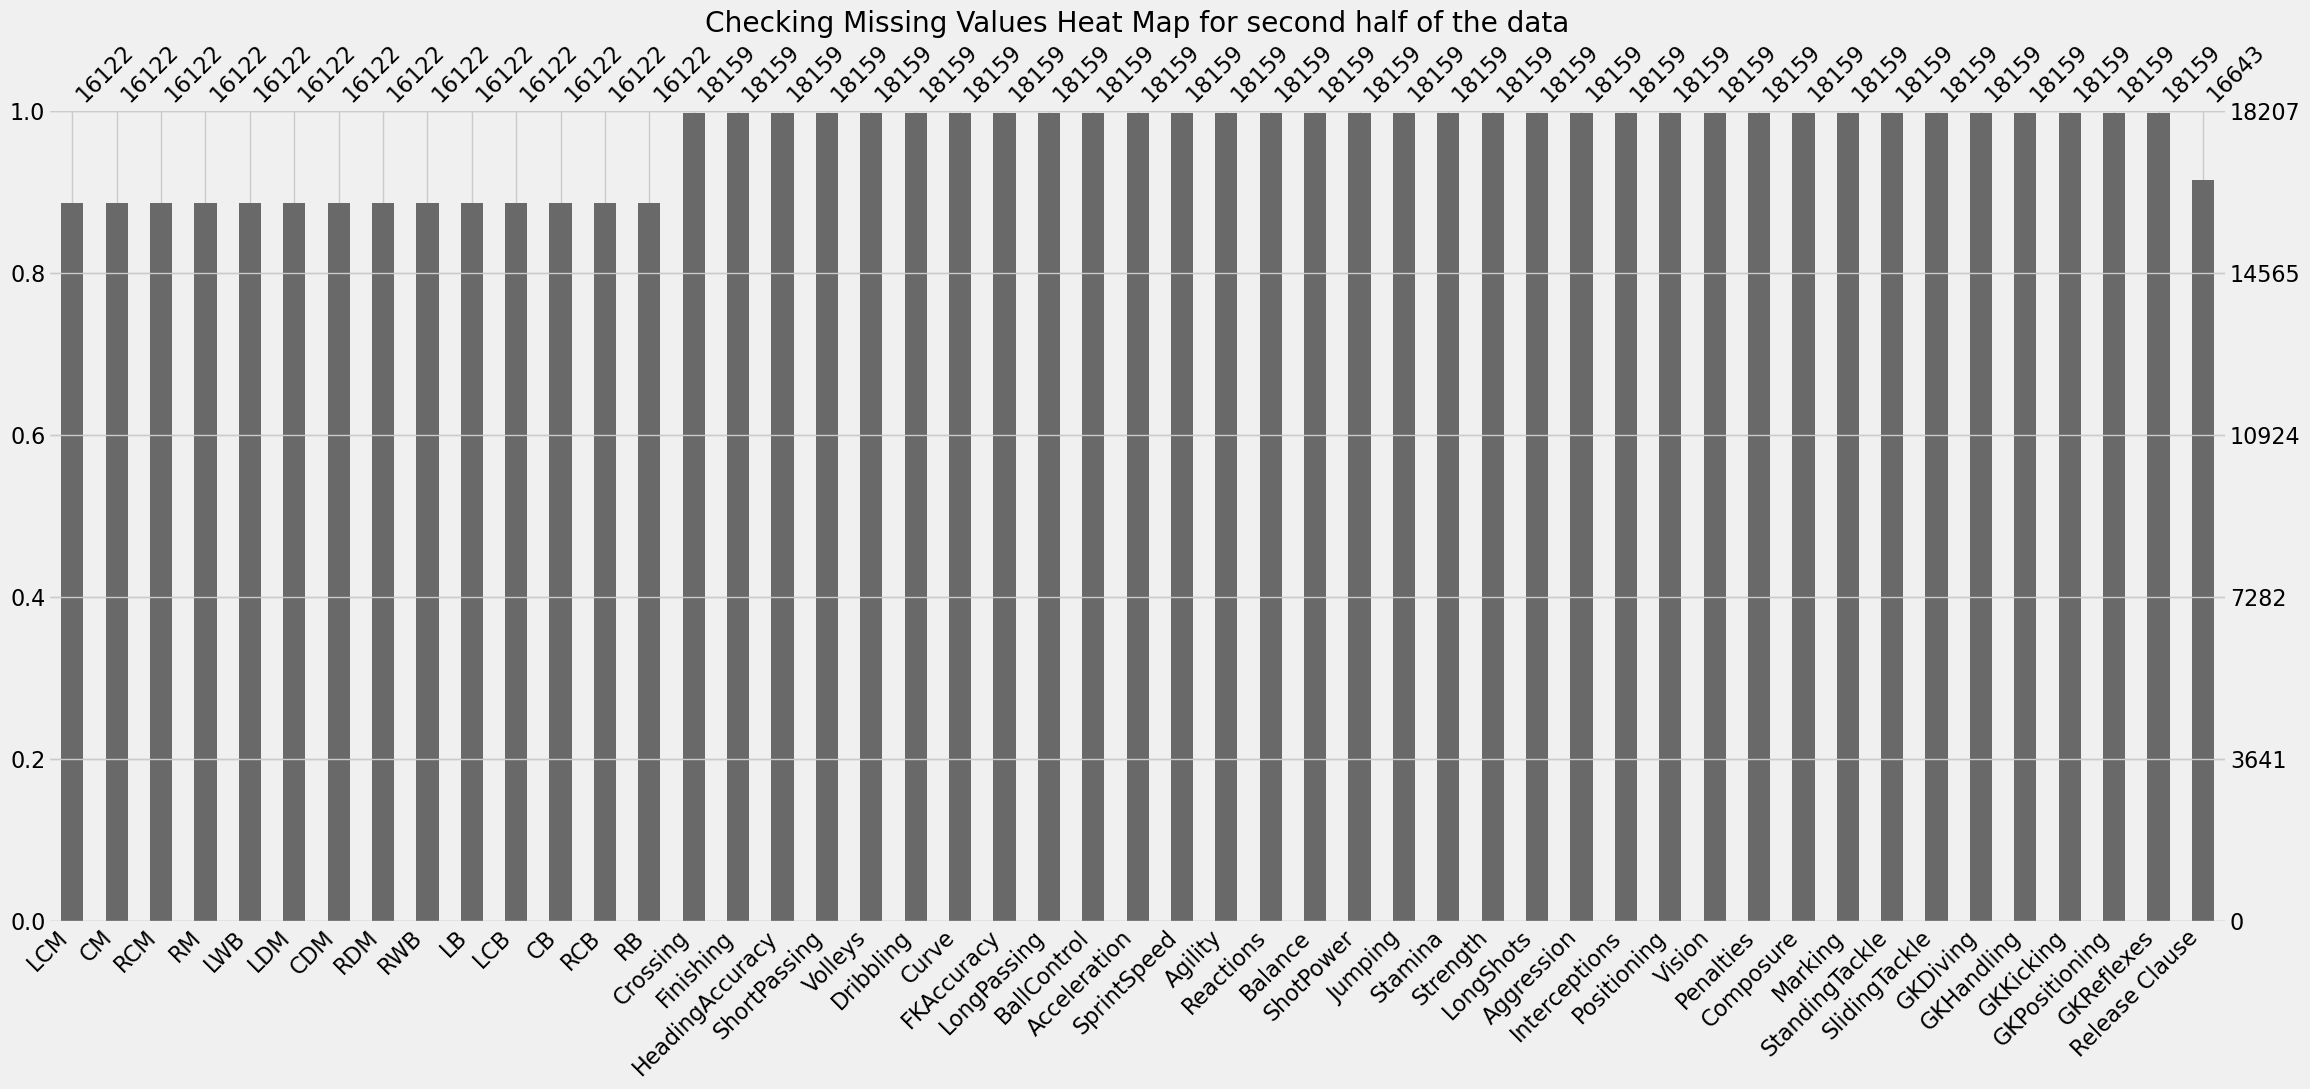

In [38]:
# Visualize missing values as a matrix 
mno.bar(data.iloc[:, 40:]) 
plt.title('Checking Missing Values Heat Map for second half of the data')
plt.show()

# Missing Values Imputation

In [39]:
# filling the missing value for the continous variables for proper data visualization

data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)

data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)

In [40]:
data.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [41]:
# impute with 0 for rest of the columns
data.fillna(0, inplace = True)

# lets check whether the data still has any missing values
data.isnull().sum().sum()

0

# Feature Engineering

In [42]:
# creating new features by aggregating the features

def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [43]:
# adding these categories to the data

data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)


In [44]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

# Data Visualization

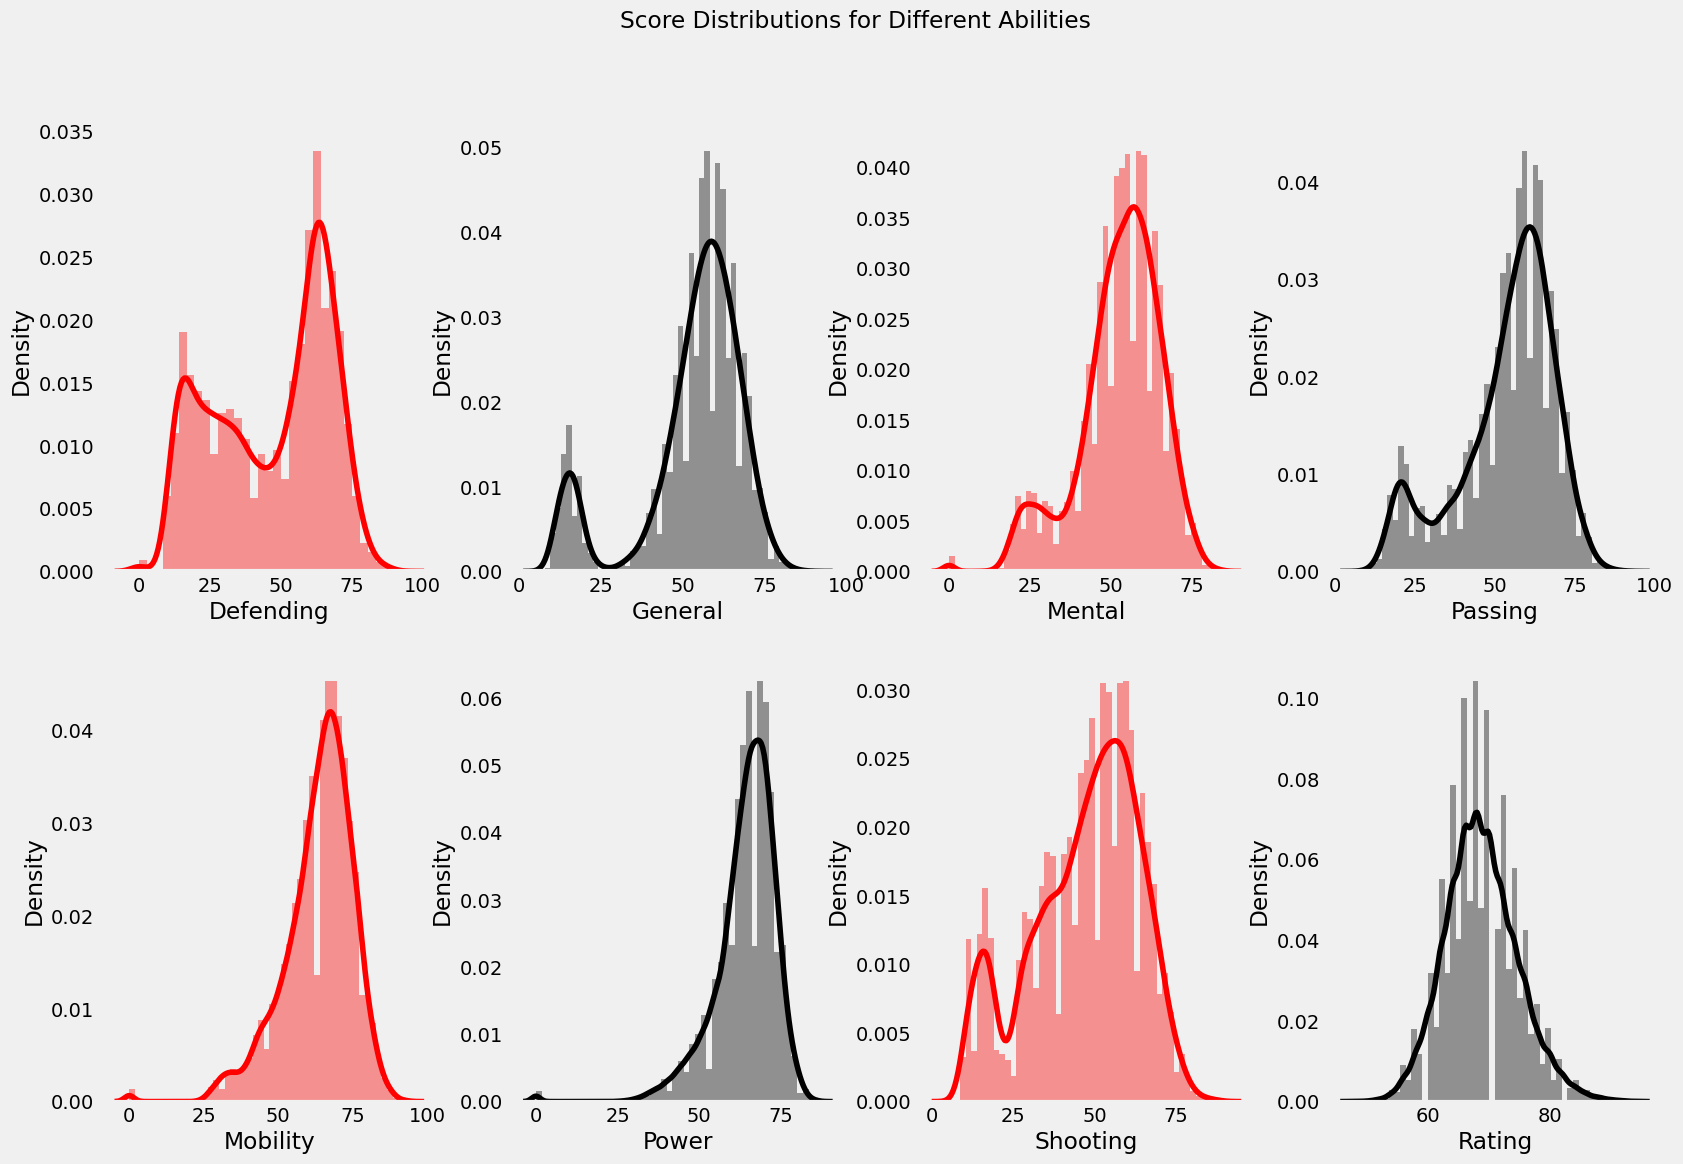

In [45]:
plt.rcParams['figure.figsize'] = (18, 12)
plt.subplot(2, 4, 1)
sns.distplot(data['Defending'], color = 'red')
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(data['General'], color = 'black')
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(data['Mental'], color = 'red')
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(data['Passing'], color = 'black')
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(data['Mobility'], color = 'red')
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(data['Power'], color = 'black')
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(data['Shooting'], color = 'red')
plt.grid()

plt.subplot(2, 4, 8)
sns.distplot(data['Rating'], color = 'black')
plt.grid()

plt.suptitle('Score Distributions for Different Abilities')
plt.show()

In [46]:
# comparison of preferred foot over the different players

plt.rcParams['figure.figsize'] = (8, 3)
sns.countplot(data['Preferred Foot'], palette = 'pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

ValueError: could not convert string to float: 'Left'

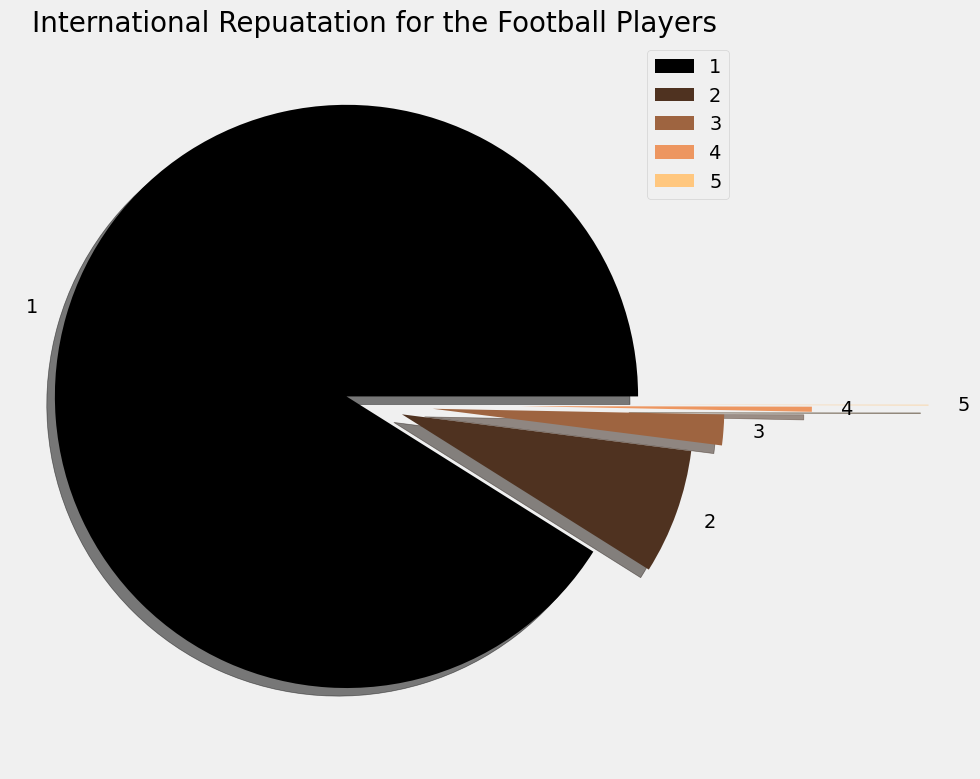

In [47]:
# plotting a pie chart to represent share of international repuatation

labels = ['1', '2', '3', '4', '5']  #data['International Reputation'].index
sizes = data['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True,)
plt.title('International Repuatation for the Football Players', fontsize = 20)
plt.legend()
plt.show()

**Let's check the Players with International Reputation as 5**

In [48]:
data[data['International Reputation'] == 5][['Name','Nationality',
                            'Overall']].sort_values(by = 'Overall',
                                        ascending = False).style.background_gradient(cmap = 'magma')

,Name,Nationality,Overall
0,L. Messi,Argentina,94
1,Cristiano Ronaldo,Portugal,94
2,Neymar Jr,Brazil,92
7,L. Suárez,Uruguay,91
22,M. Neuer,Germany,89
109,Z. Ibrahimović,Sweden,85


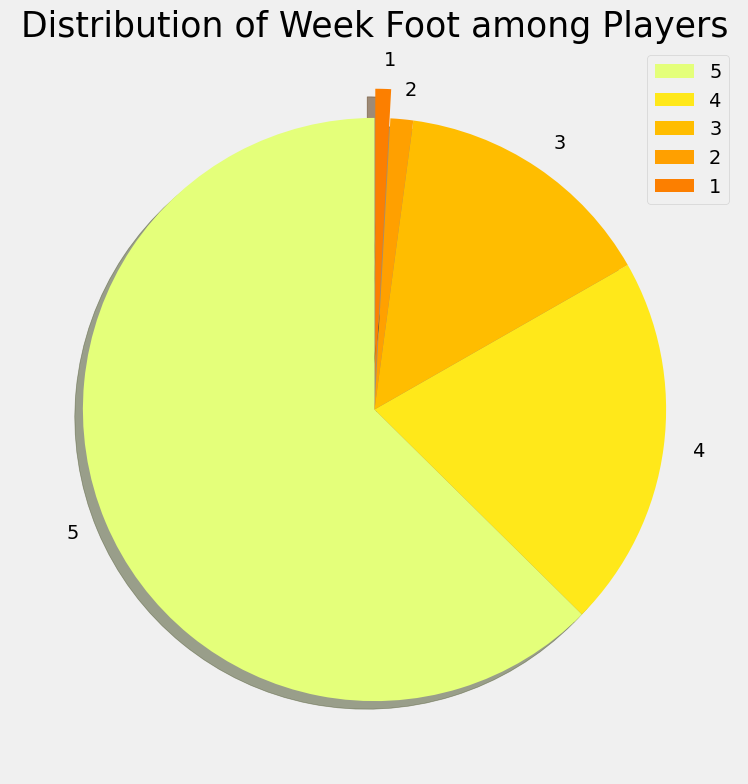

In [49]:
# plotting a pie chart to represent the share of week foot players

labels = ['5', '4', '3', '2', '1'] 
size = data['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Week Foot among Players', fontsize = 25)
plt.legend()
plt.show()

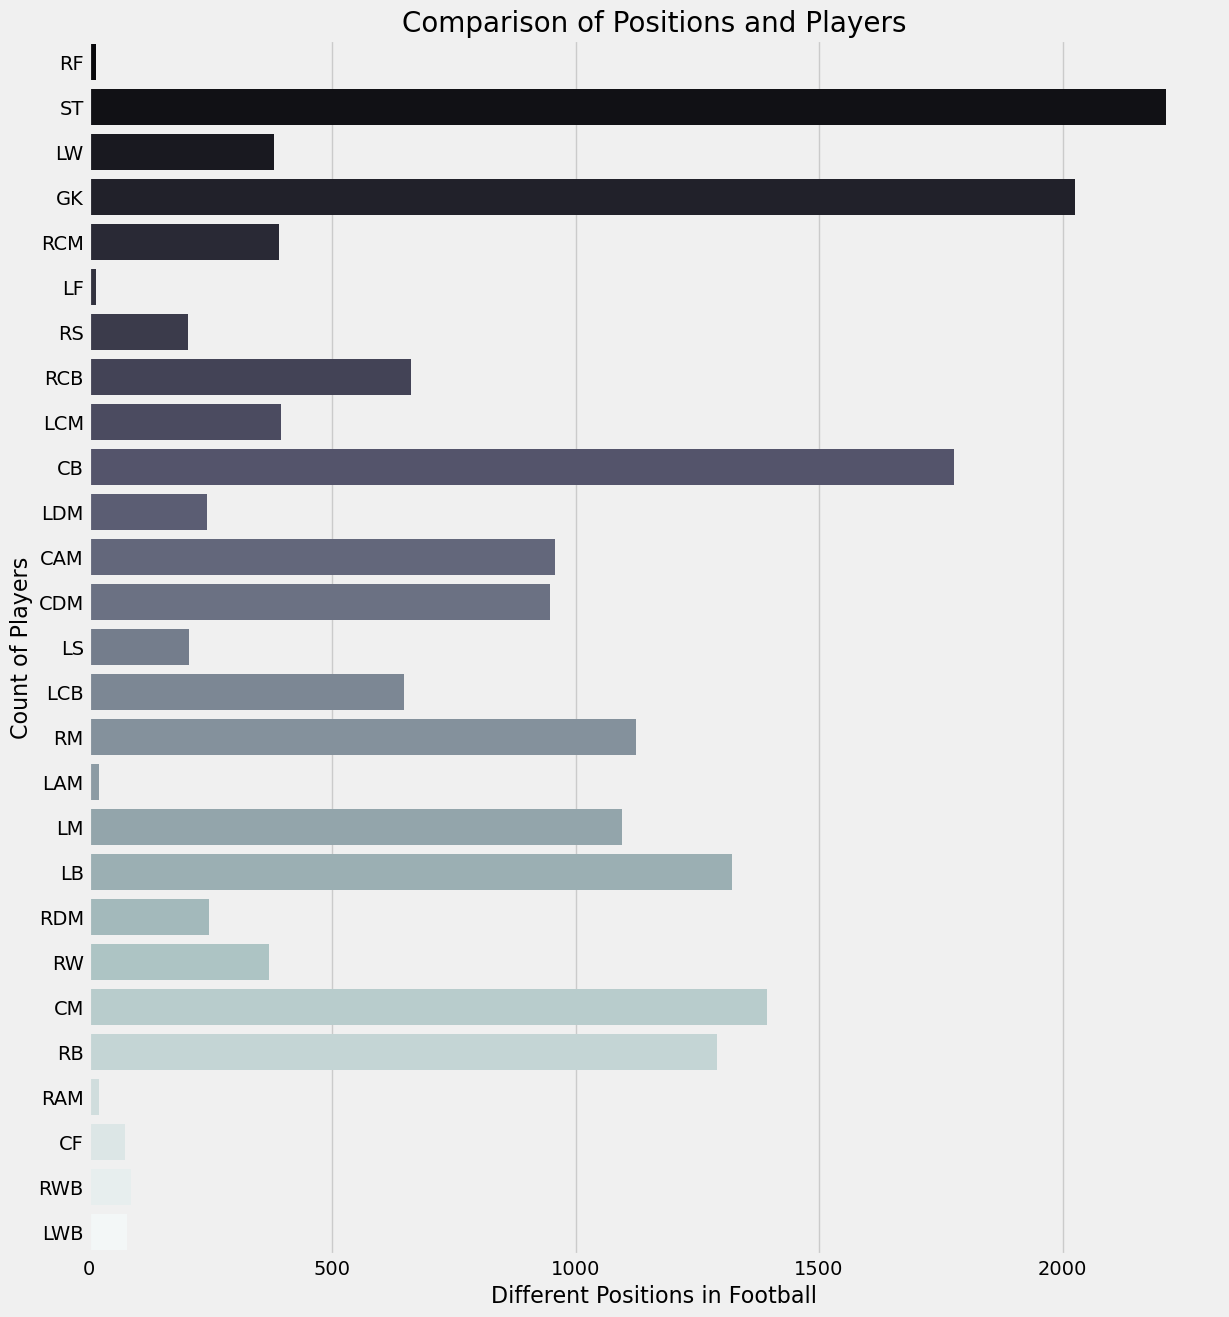

In [50]:
# different positions acquired by the players 

plt.figure(figsize = (13, 15))
plt.style.use('fivethirtyeight')
ax = sns.countplot(y = 'Position', data = data, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

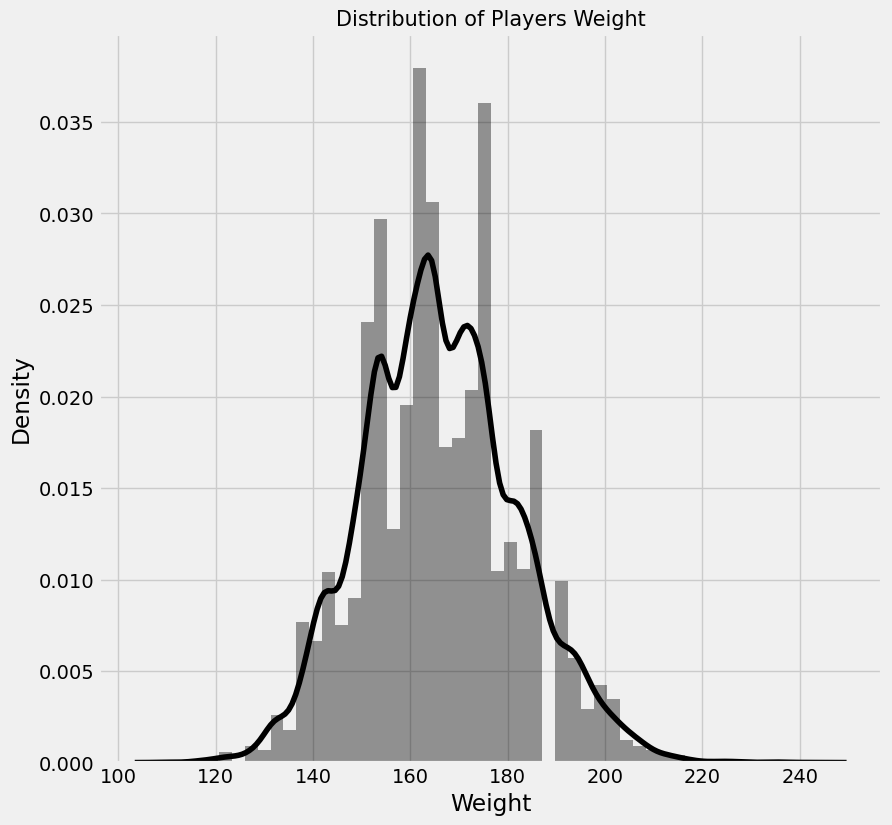

In [51]:
# defining a function for cleaning the Weight data

def extract_value_from(value):
  out = value.replace('lbs', '')
  return float(out)

# applying the function to weight column
#data['value'] = data['value'].apply(lambda x: extract_value_from(x))
data['Weight'] = data['Weight'].apply(lambda x : extract_value_from(x))

# plotting the distribution of weight of the players
sns.distplot(data['Weight'], color = 'black')
plt.title("Distribution of Players Weight", fontsize = 15)
plt.show()

In [52]:
# defining a function for cleaning the wage column

def extract_value_from(column):
    out = column.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in column:
        out = float(out.replace('K', ''))*1000
    return float(out)

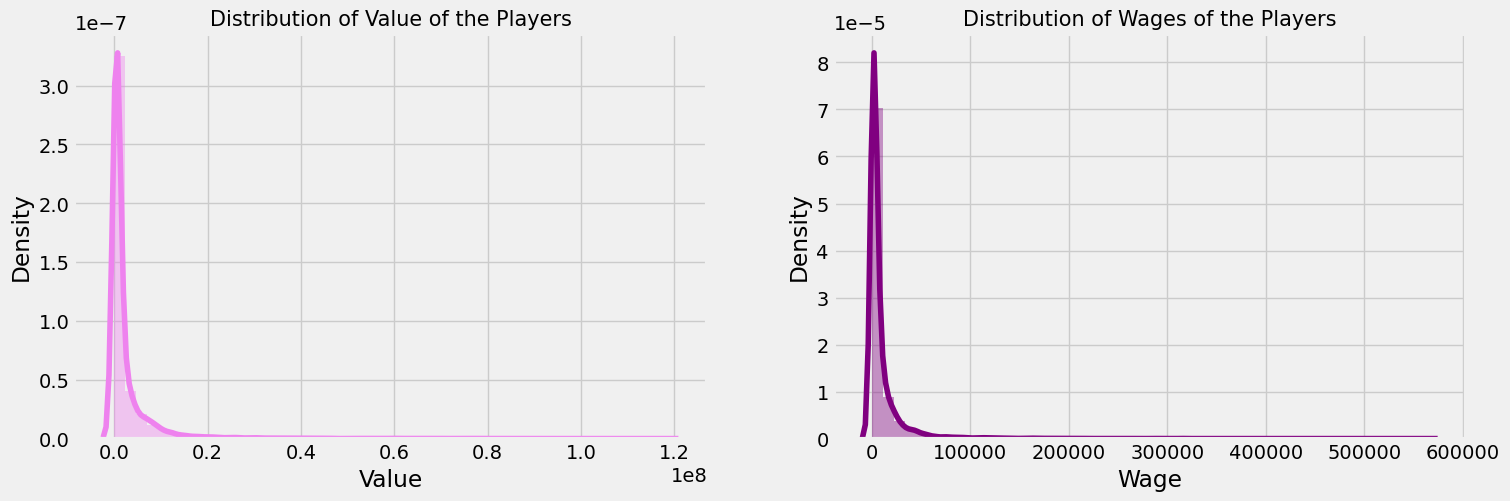

In [53]:
# applying the function to the wage and value column
data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

# visualizing the data
plt.rcParams['figure.figsize'] = (16, 5)
plt.subplot(1, 2, 1)
sns.distplot(data['Value'], color = 'violet')
plt.title('Distribution of Value of the Players', fontsize = 15)

plt.subplot(1, 2, 2)
sns.distplot(data['Wage'], color = 'purple')
plt.title('Distribution of Wages of the Players', fontsize = 15)
plt.show()

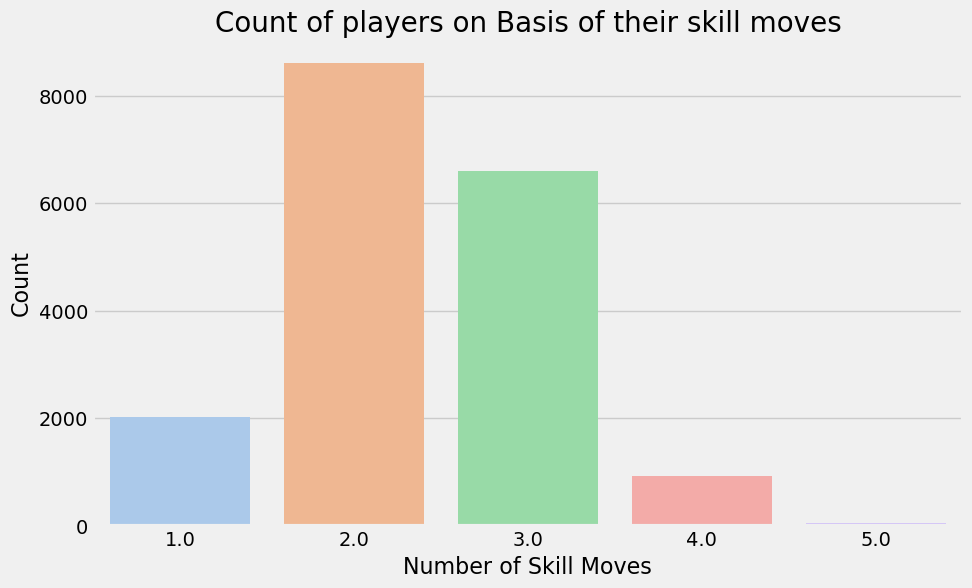

In [54]:
# Skill Moves of Players

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Skill Moves', data = data, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

In [55]:
data[(data['Skill Moves'] == 5.0) & (data['Age'] < 20)][['Name','Age']]

,Name,Age
25,K. Mbappé,19
1004,J. Sancho,18
1143,Vinícius Júnior,17
2495,M. Ødegaard,19


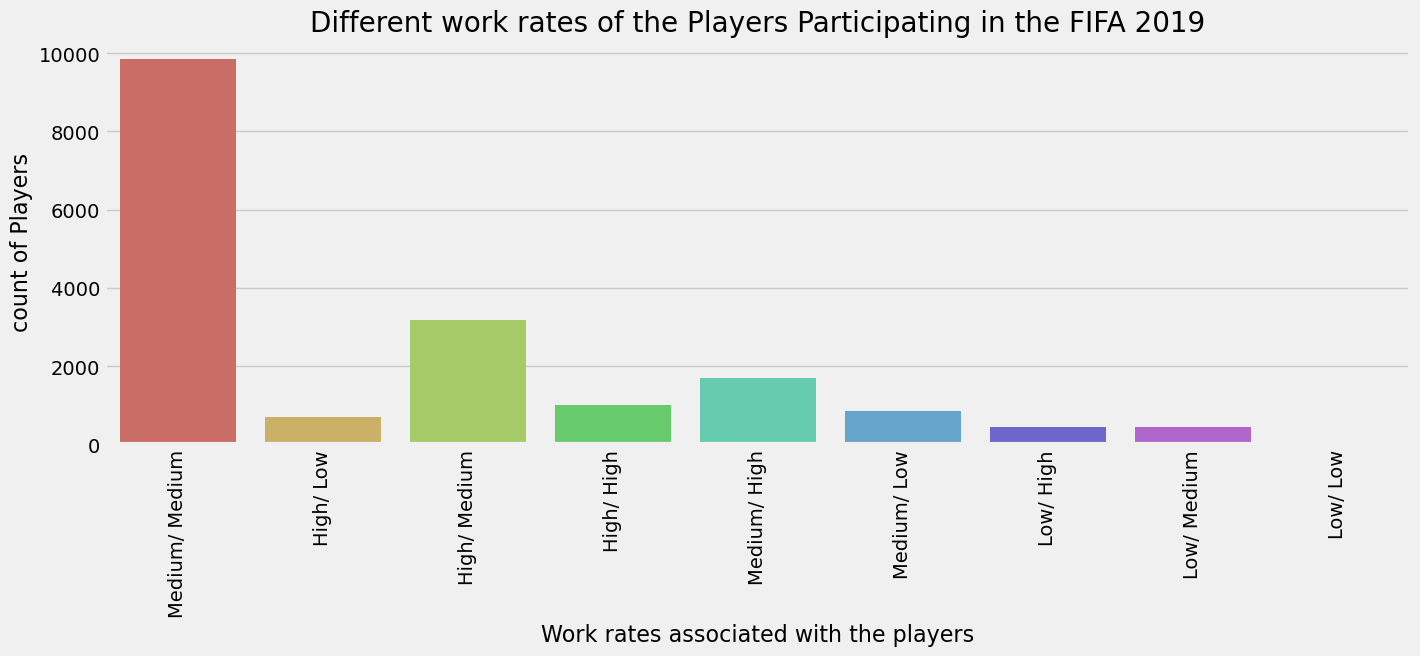

In [56]:
# To show Different Work rate of the players participating in the FIFA 2019

plt.figure(figsize = (15, 5))
plt.style.use('fivethirtyeight')

sns.countplot(x = 'Work Rate', data = data, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

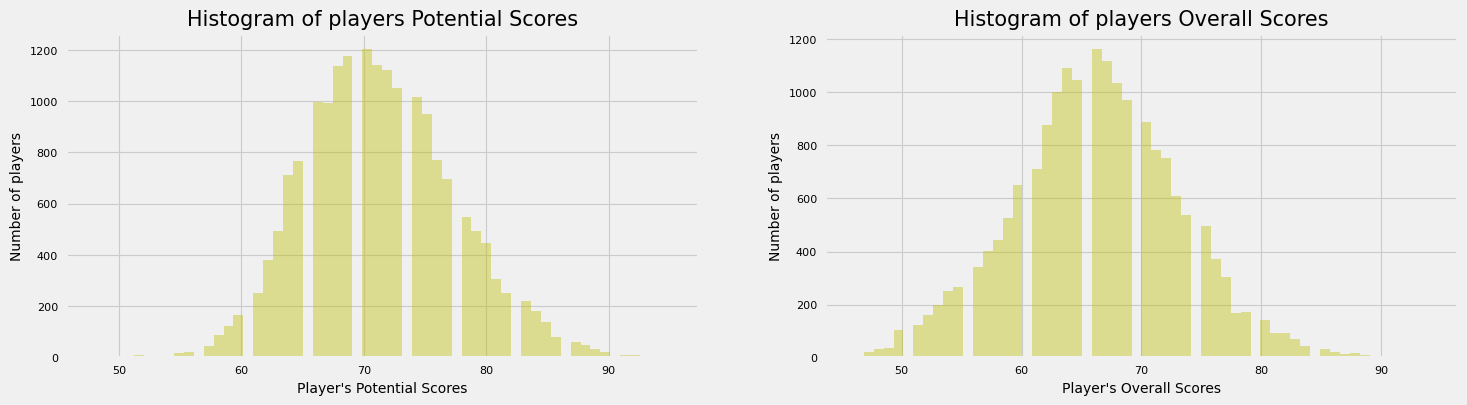

In [57]:
# To show Different potential scores of the players participating in the FIFA 2019

plt.figure(figsize=(16, 4))
plt.style.use('seaborn-paper')

plt.subplot(1, 2, 1)
x = data.Potential
ax = sns.distplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player's Potential Scores", fontsize = 10)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 10)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 15)

plt.subplot(1, 2, 2)
y = data.Overall
ax = sns.distplot(y, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player's Overall Scores", fontsize = 10)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 10)
ax.set_title(label = 'Histogram of players Overall Scores', fontsize = 15)
plt.show()

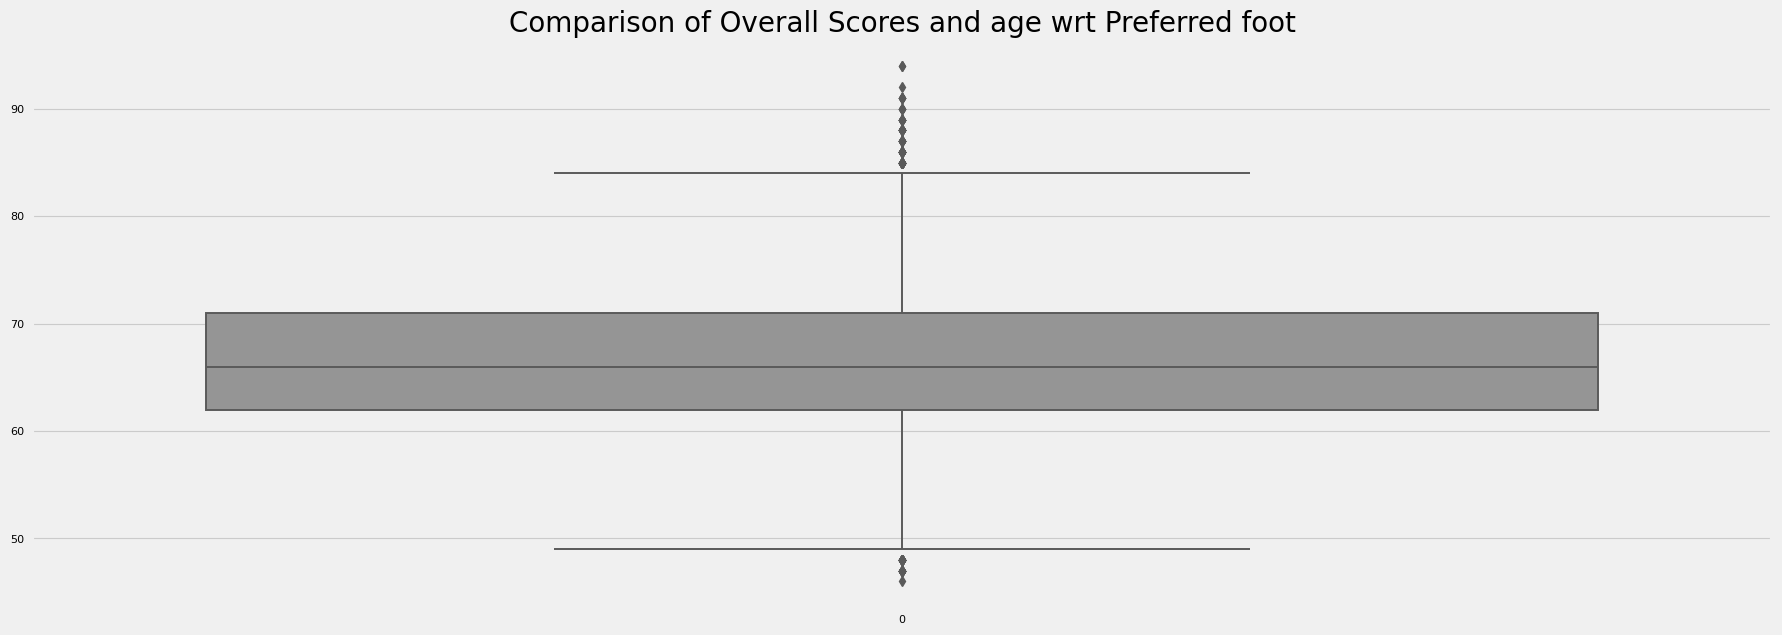

In [82]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxplot(data['Overall'],  palette = 'Greys')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()

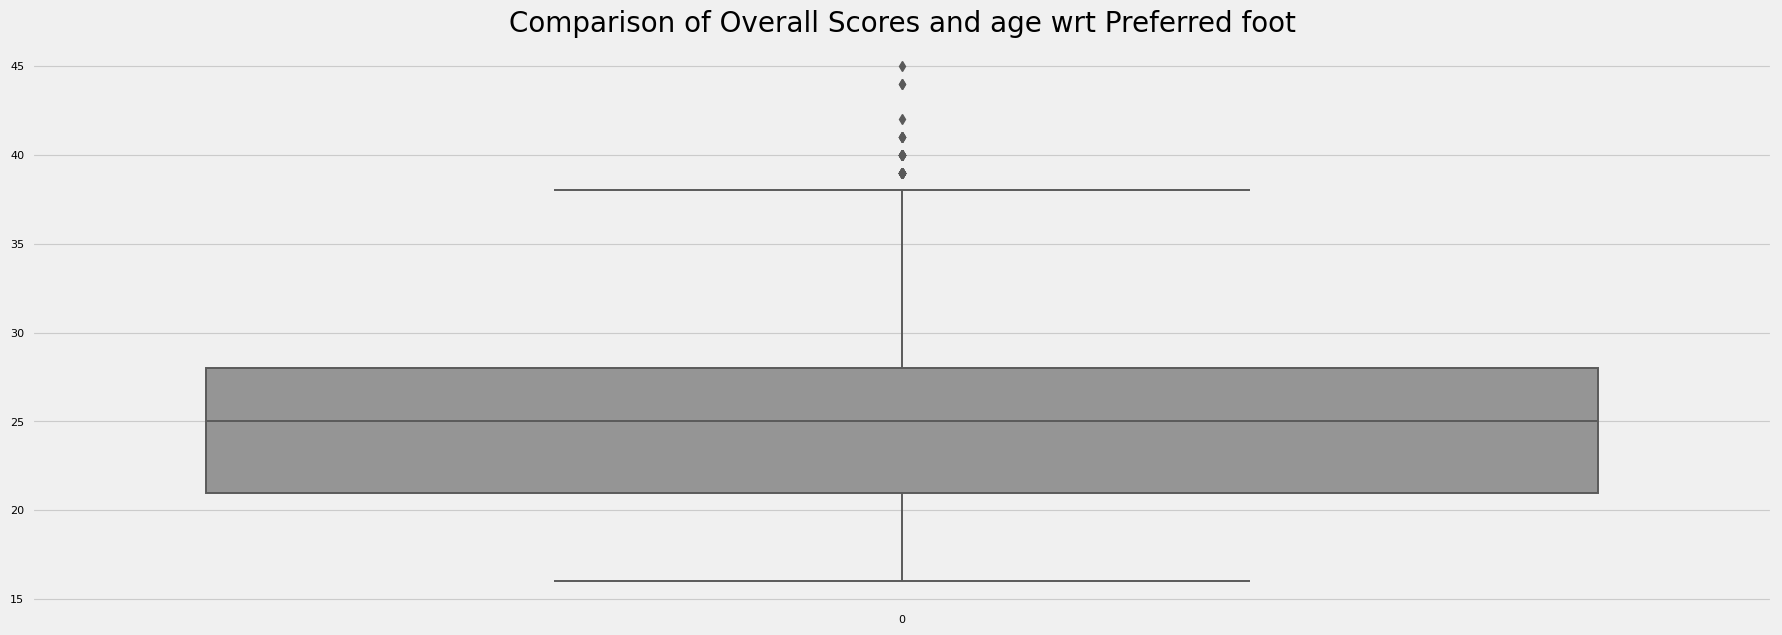

In [83]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxplot(data['Age'],  palette = 'Greys')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()

**Countries with Most Players**

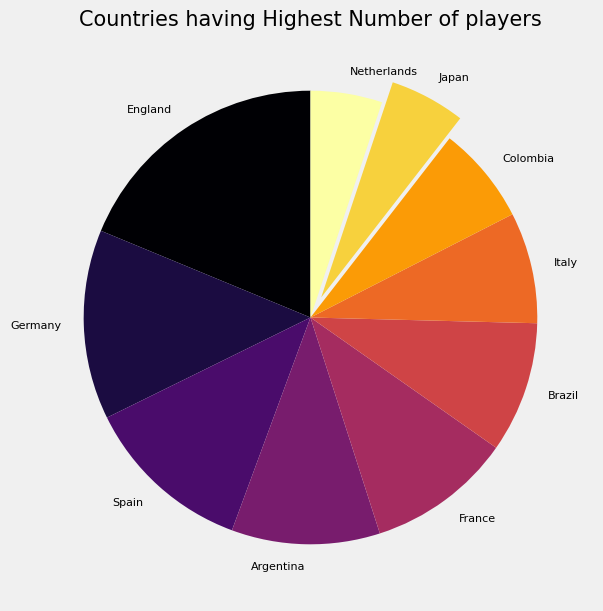

In [59]:
# picking up the countries with highest number of players to compare their overall scores

data['Nationality'].value_counts().head(10).plot(kind = 'pie', cmap = 'inferno',
                                        startangle = 90, explode = [0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0])
plt.title('Countries having Highest Number of players', fontsize = 15)
plt.axis('off')
plt.show()

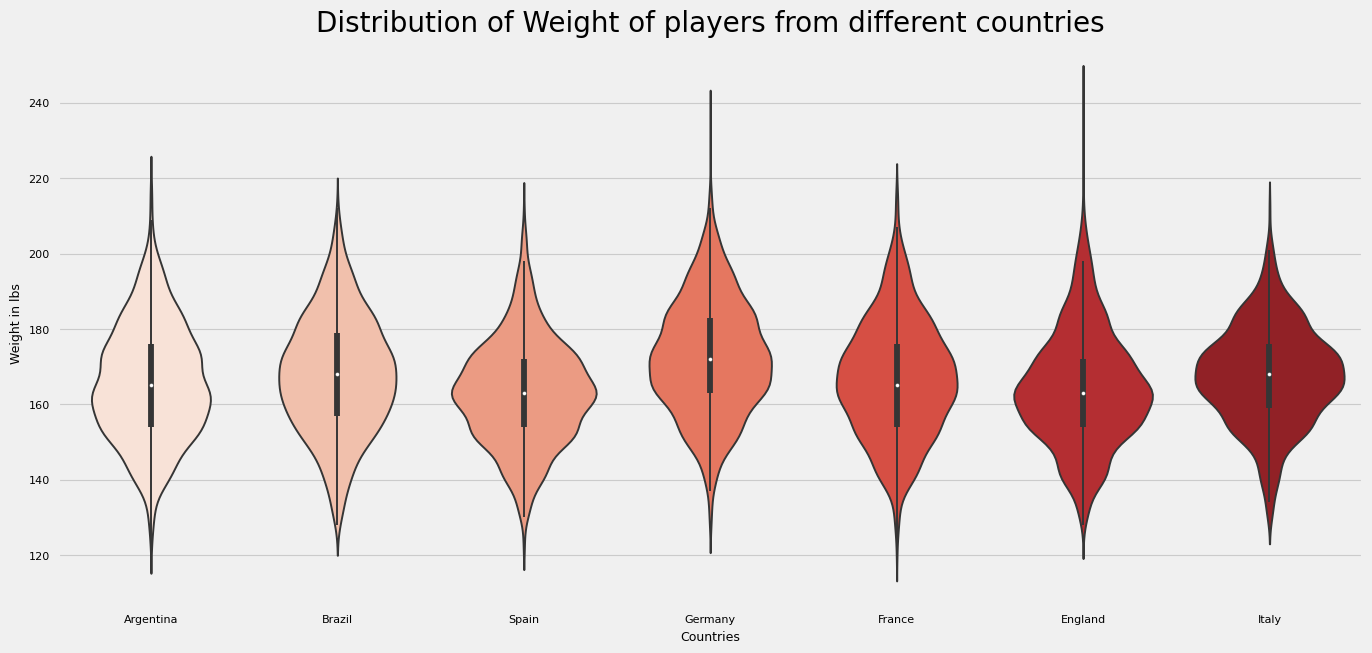

In [60]:
# Every Nations' Player and their Weights

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Weight']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['Weight'], palette = 'Reds')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight of players from different countries', fontsize = 20)
plt.show()

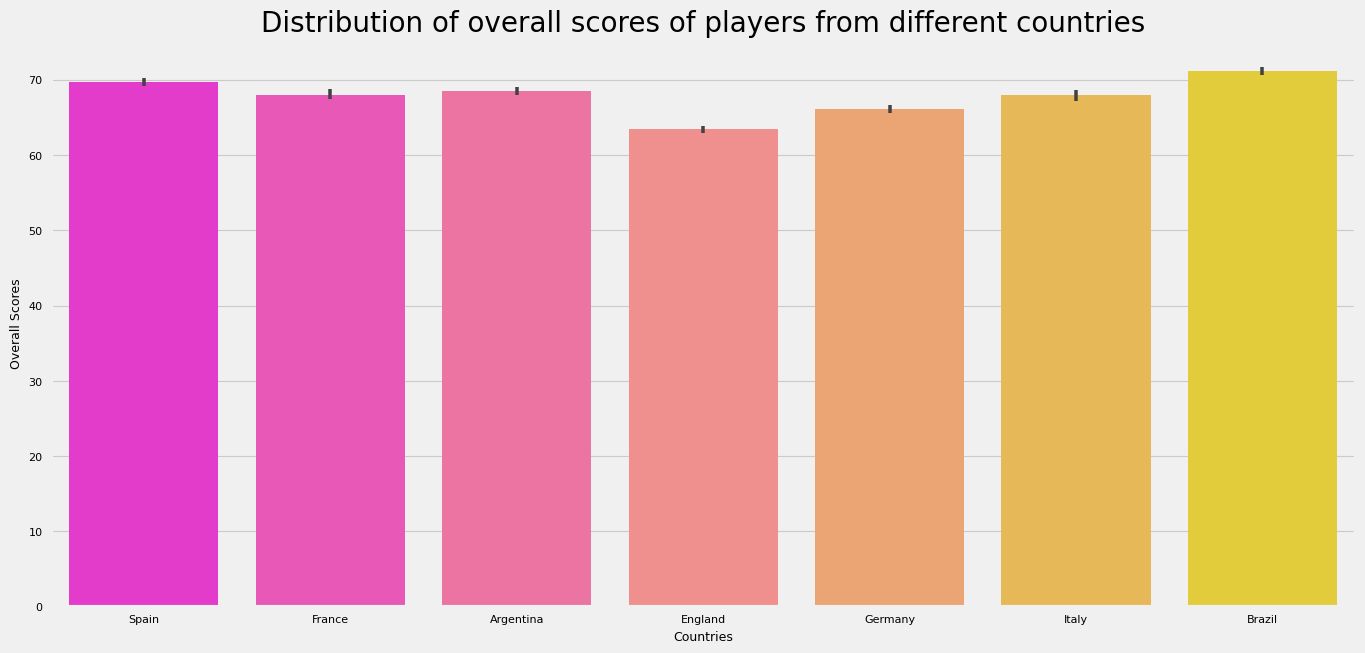

In [61]:
# Every Nations' Player and their overall scores

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

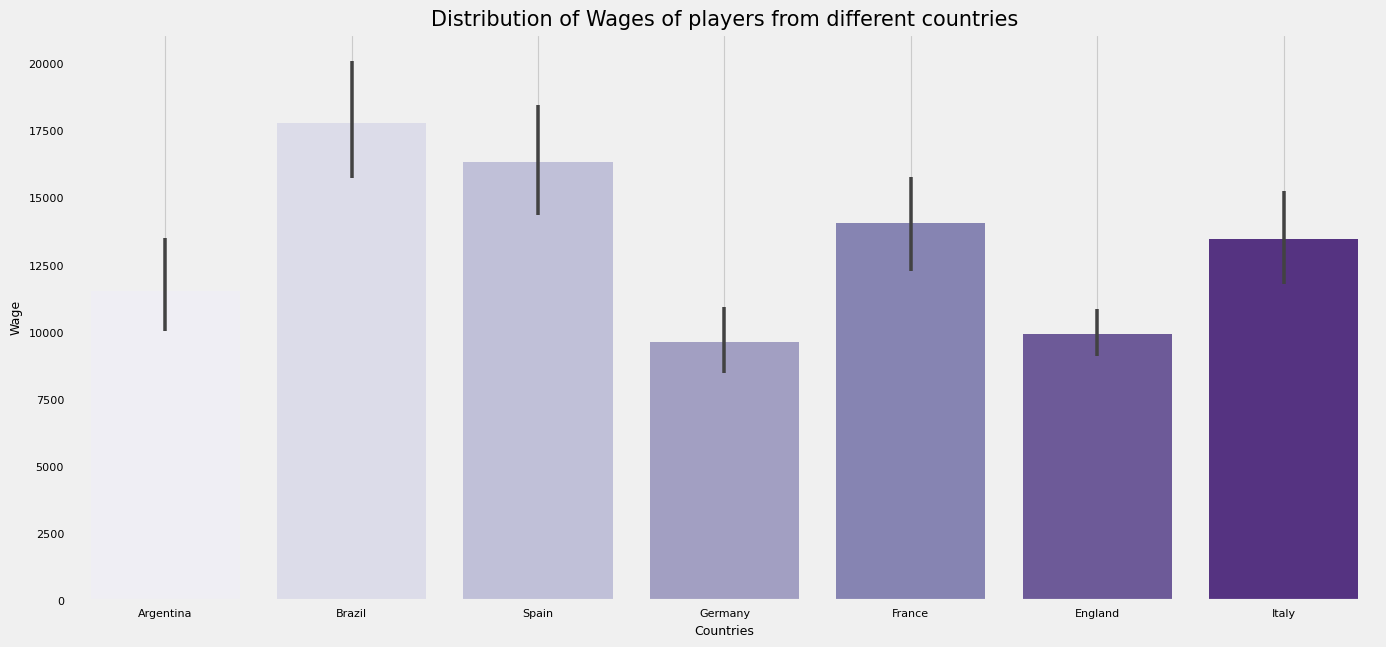

In [62]:
# Every Nations' Player and their wages

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Wage']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'], palette = 'Purples')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries', fontsize = 15)
plt.grid()
plt.show()

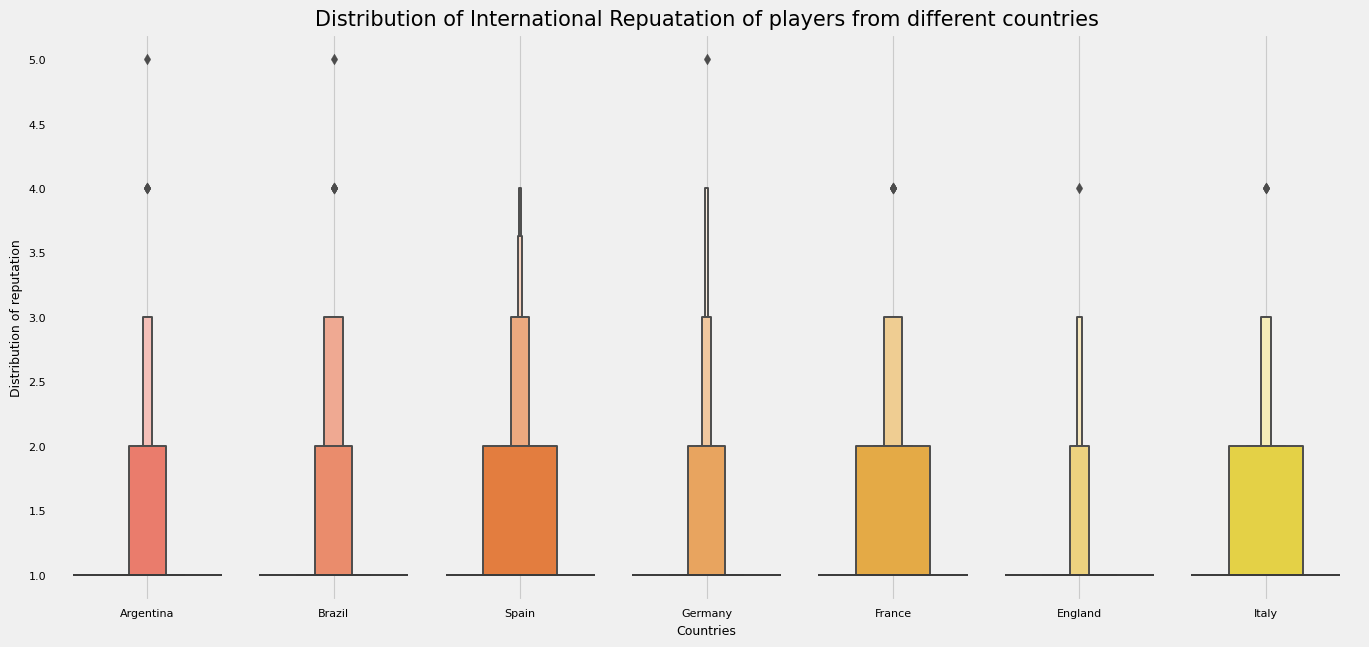

In [63]:
# Every Nations' Player and their International Reputation

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.boxenplot(x = data_countries['Nationality'], y = data_countries['International Reputation'], palette = 'autumn')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of reputation', fontsize = 9)
ax.set_title(label = 'Distribution of International Repuatation of players from different countries', fontsize = 15)
plt.grid()
plt.show()

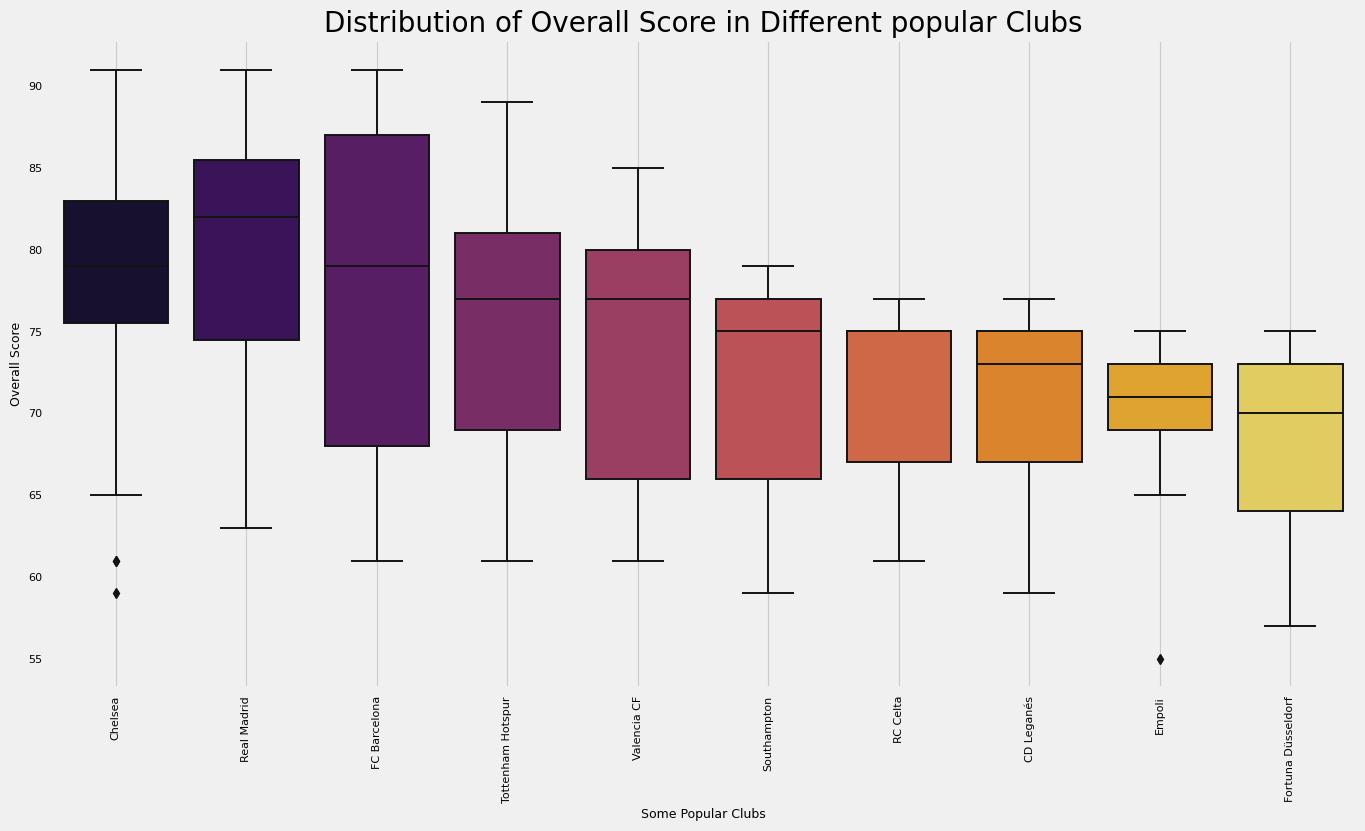

In [64]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

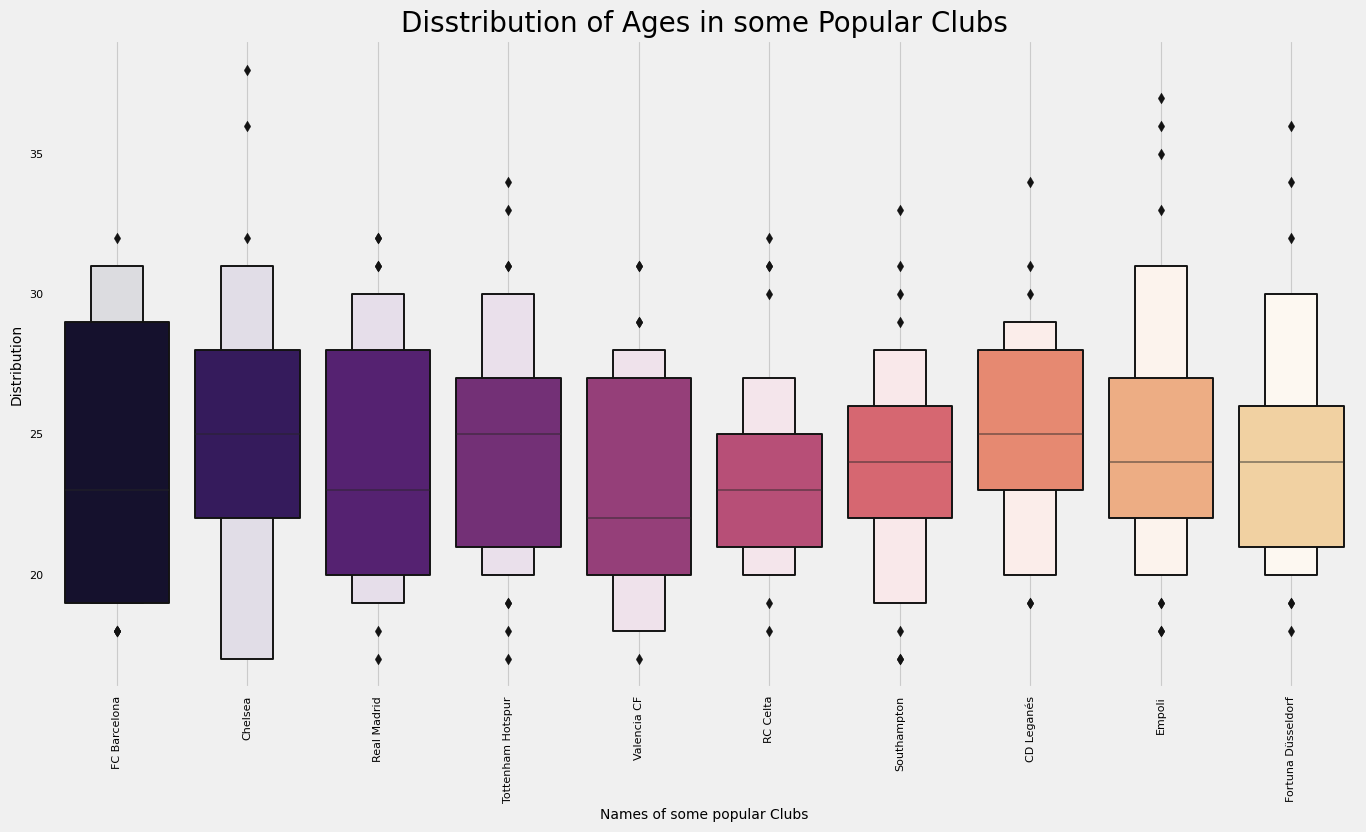

In [65]:
# Distribution of Ages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxenplot(x = 'Club', y = 'Age', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Ages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

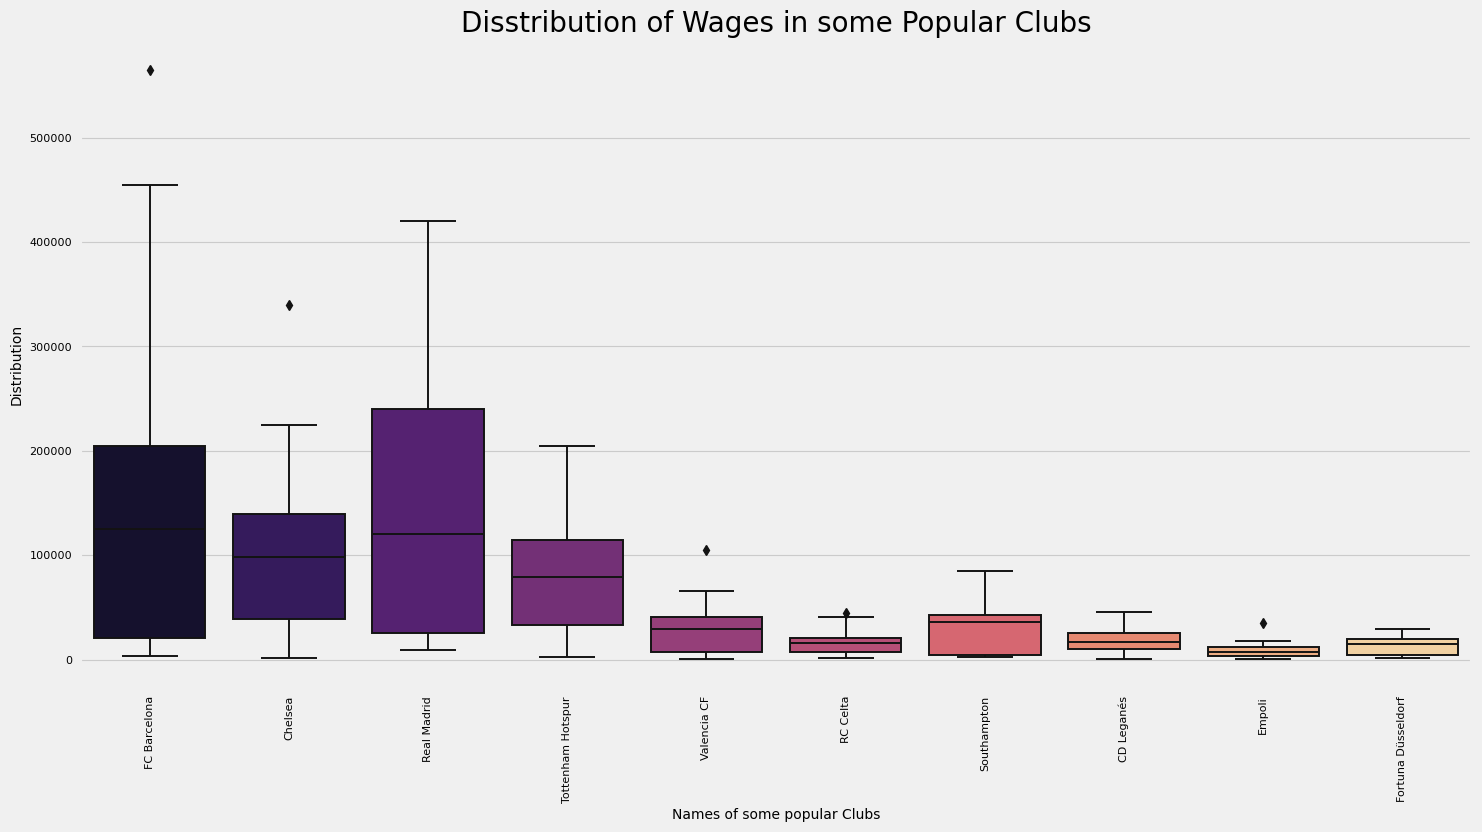

In [66]:
# Distribution of Wages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = 'Club', y = 'Wage', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Wages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

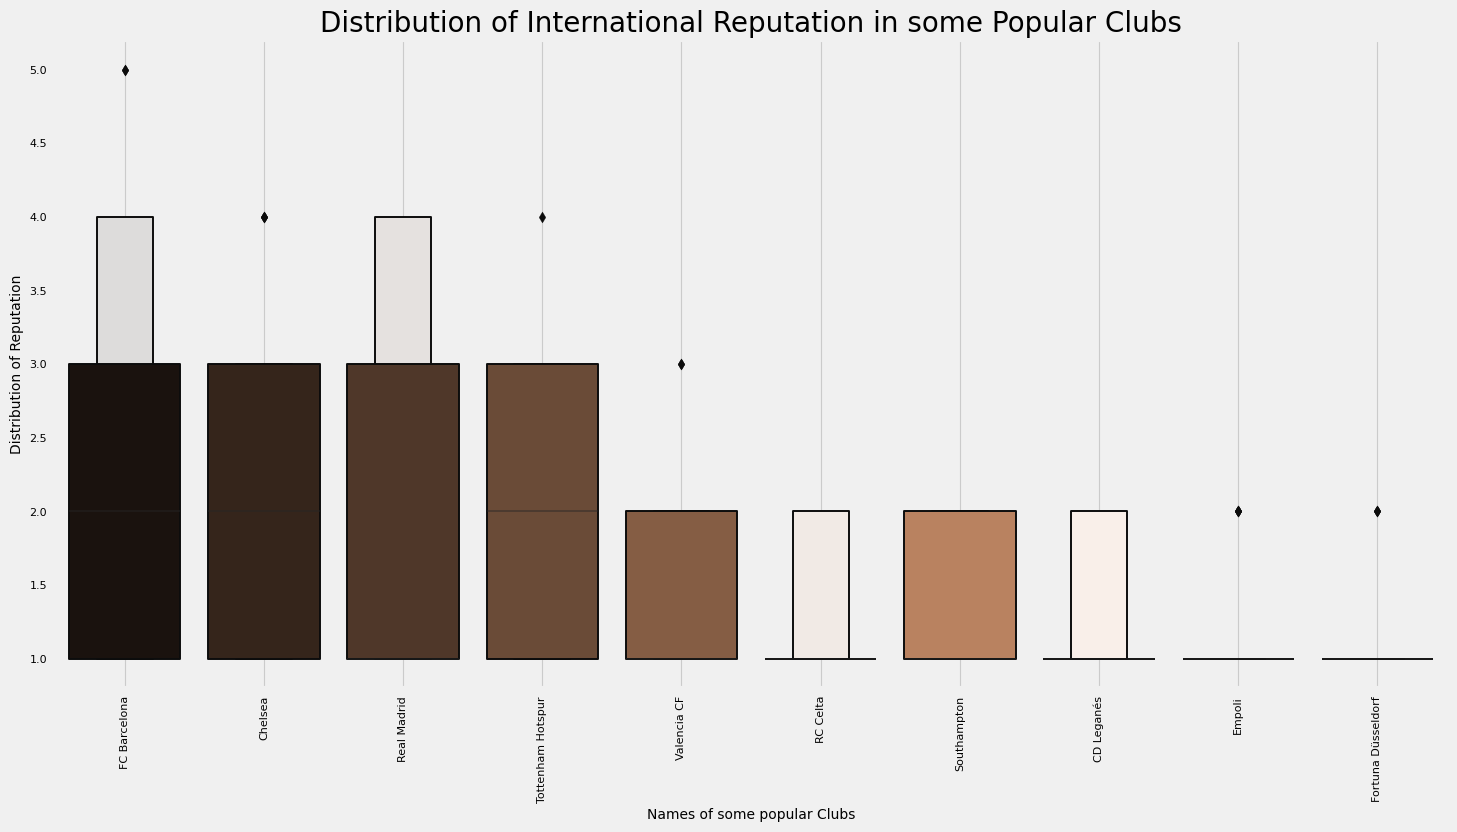

In [67]:
# Distribution of Wages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxenplot(x = 'Club', y = 'International Reputation', data = data_club, palette = 'copper')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution of Reputation', fontsize = 10)
ax.set_title(label = 'Distribution of International Reputation in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

**Query Analysis**

Best Players per each position with their age, club, and nationality based on their Overall Scores

In [68]:
data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club',
                             'Nationality','Overall']].sort_values(by = 'Overall',
                                        ascending = False).style.background_gradient(cmap = 'pink')

,Position,Name,Age,Club,Nationality,Overall
1,ST,Cristiano Ronaldo,33,Juventus,Portugal,94
0,RF,L. Messi,31,FC Barcelona,Argentina,94
2,LW,Neymar Jr,26,Paris Saint-Germain,Brazil,92
5,LF,E. Hazard,27,Chelsea,Belgium,91
7,RS,L. Suárez,31,FC Barcelona,Uruguay,91
4,RCM,K. De Bruyne,27,Manchester City,Belgium,91
3,GK,De Gea,27,Manchester United,Spain,91
8,RCB,Sergio Ramos,32,Real Madrid,Spain,91
12,CB,D. Godín,32,Atlético Madrid,Uruguay,90
11,LCM,T. Kroos,28,Real Madrid,Germany,90


**Best Players for each Skill**

In [69]:
## Let's Analyze the Skills of Players

@interact
def skill(skills = ['Defending', 'General', 'Mental', 'Passing', 
                       'Mobility', 'Power', 'Rating','Shooting'], score = 75):
    return data[data[skills] > score][['Name', 'Nationality', 'Club', 'Overall', skills]].sort_values(by = skills,
                                    ascending = False).head(20).style.background_gradient(cmap = 'Blues')

interactive(children=(Dropdown(description='skills', options=('Defending', 'General', 'Mental', 'Passing', 'Mo…

# Let's make a function to get the list of Top 15 Players from each Country

In [70]:
# lets make an interactive function for getting a report of the players country wise

# lets make a function to see the list of top 15 players from each country
@interact
def country(country = list(data['Nationality'].value_counts().index)):
    return data[data['Nationality'] == country][['Name','Position','Overall',
                    'Potential']].sort_values(by = 'Overall',
                            ascending = False).head(15).style.background_gradient(cmap = 'magma')

interactive(children=(Dropdown(description='country', options=('England', 'Germany', 'Spain', 'Argentina', 'Fr…

# Let's make a function to get the list of Top 15 Players from each Club

In [71]:
# lets make an interactive function to get the list of top 15 players from each of the club

# lets define a function 
@interact
def club(club = list(data['Club'].value_counts().index[1:])):
    return data[data['Club'] == club][['Name','Jersey Number','Position','Overall','Nationality','Age','Wage',
                     'Value','Contract Valid Until']].sort_values(by = 'Overall',
                                ascending  = False).head(15).style.background_gradient(cmap = 'inferno')

interactive(children=(Dropdown(description='club', options=('FC Barcelona', 'Burnley', 'AS Monaco', 'Everton',…

**youngest Players from the FIFA 2019**

In [72]:
# finding 5 youngest Players from the dataset

youngest = data[data['Age'] == 16][['Name', 'Age', 'Club', 'Nationality', 'Overall']]
youngest.sort_values(by = 'Overall', ascending = False).head().style.background_gradient(cmap = 'magma')

,Name,Age,Club,Nationality,Overall
11457,W. Geubbels,16,AS Monaco,France,64
11732,A. Taoui,16,Toulouse Football Club,France,64
12496,Pelayo Morilla,16,Real Sporting de Gijón,Spain,63
12828,Guerrero,16,CF Rayo Majadahonda,Spain,63
13293,H. Massengo,16,AS Monaco,France,62


**15 Eldest Players from FIFA 2019**

In [73]:
data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club',
                              'Nationality', 'Overall']].head(15).style.background_gradient(cmap = 'Wistia')

,Name,Age,Club,Nationality,Overall
4741,O. Pérez,45,Pachuca,Mexico,71
18183,K. Pilkington,44,Cambridge United,England,48
17726,T. Warner,44,Accrington Stanley,Trinidad & Tobago,53
10545,S. Narazaki,42,Nagoya Grampus,Japan,65
7225,C. Muñoz,41,CD Universidad de Concepción,Argentina,68
1120,J. Villar,41,No Club,Paraguay,77
12192,H. Sulaimani,41,Ohod Club,Saudi Arabia,63
15426,M. Tyler,41,Peterborough United,England,59
4228,B. Nivet,41,ESTAC Troyes,France,71
10356,F. Kippe,40,Lillestrøm SK,Norway,65


**The longest membership in the club**


In [74]:
now = datetime.datetime.now()
data['Join_year'] = data.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
data['Years_of_member'] = (data.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int')
membership = data[['Name', 'Club', 'Years_of_member']].sort_values(by = 'Years_of_member', ascending = False).head(10)
membership.set_index('Name', inplace=True)
membership.style.background_gradient(cmap = 'Reds')

,Club,Years_of_member
Name,,
O. Pérez,Pachuca,32
M. Al Shalhoub,Al Hilal,25
H. Sogahata,Kashima Antlers,25
M. Ogasawara,Kashima Antlers,25
S. Narazaki,Nagoya Grampus,24
M. Wölfli,BSC Young Boys,23
K. Kitamoto,Vissel Kobe,23
C. Källqvist,BK Häcken,22
Y. Endo,Gamba Osaka,22


In [75]:
import ipywidgets as widgets
from ipywidgets import interact
@interact
def check(column = 'Years_of_member', 
          club = ['FC Barcelona', 'Real Madrid', 'Chelsea'], x = 4):
    return data[(data[column] > x) & (data['Club'] == club)][['Name', 'Club',
                                             'Years_of_member']].sort_values(by = 'Years_of_member',
                                                                ascending = False).style.background_gradient(cmap = 'magma')

interactive(children=(Text(value='Years_of_member', description='column'), Dropdown(description='club', option…

**Defining the features of players**

In [76]:
# defining the features of players

player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

**Top 10 left footed footballers**

In [77]:
data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club',
         'Nationality', 'Overall']].sort_values(by = 'Overall',
            ascending = False).head(10).style.background_gradient(cmap = 'bone')

,Name,Age,Club,Nationality,Overall
0,L. Messi,31,FC Barcelona,Argentina,94
13,David Silva,32,Manchester City,Spain,90
15,P. Dybala,24,Juventus,Argentina,89
17,A. Griezmann,27,Atlético Madrid,France,89
19,T. Courtois,26,Real Madrid,Belgium,89
24,G. Chiellini,33,Juventus,Italy,89
35,Marcelo,30,Real Madrid,Brazil,88
37,H. Lloris,31,Tottenham Hotspur,France,88
36,G. Bale,28,Real Madrid,Wales,88
28,J. Rodríguez,26,FC Bayern München,Colombia,88


**Top 10 Right footed footballers**

In [78]:
data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club',
                    'Nationality', 'Overall']].sort_values(by = 'Overall',
                            ascending = False).head(10).style.background_gradient(cmap = 'copper')

,Name,Age,Club,Nationality,Overall
1,Cristiano Ronaldo,33,Juventus,Portugal,94
2,Neymar Jr,26,Paris Saint-Germain,Brazil,92
3,De Gea,27,Manchester United,Spain,91
4,K. De Bruyne,27,Manchester City,Belgium,91
5,E. Hazard,27,Chelsea,Belgium,91
6,L. Modrić,32,Real Madrid,Croatia,91
7,L. Suárez,31,FC Barcelona,Uruguay,91
8,Sergio Ramos,32,Real Madrid,Spain,91
9,J. Oblak,25,Atlético Madrid,Slovenia,90
10,R. Lewandowski,29,FC Bayern München,Poland,90


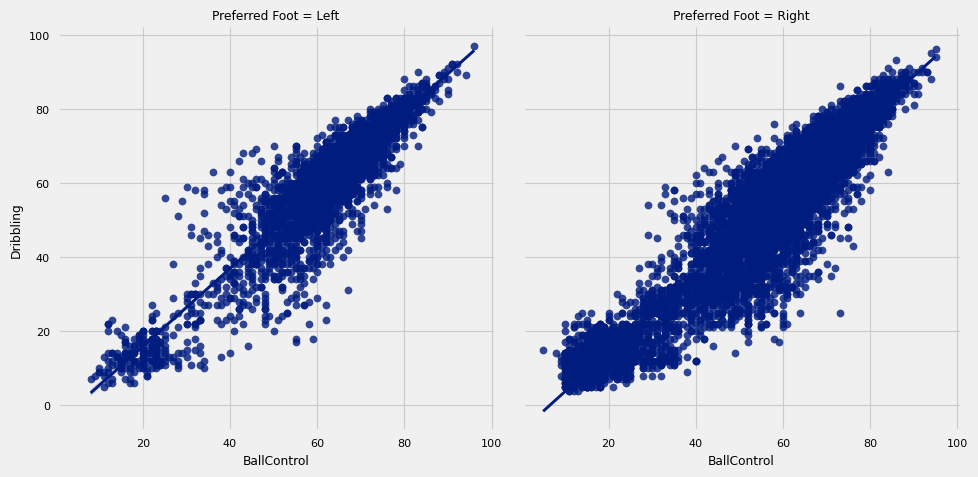

In [79]:
# comparing the performance of left-footed and right-footed footballers
# ballcontrol vs dribbing

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')
plt.show()
